In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow

In [3]:
print(tensorflow.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('Headshots',target_size=(224,224),color_mode='rgb',batch_size=32,class_mode='categorical',shuffle=True)

Found 312 images belonging to 2 classes.


In [8]:
train_generator.class_indices.values()
NO_CLASSES = len(train_generator.class_indices.values())

In [7]:
!pip install keras_vggface
!pip install keras_applications

     ------------------------------------ 151.6/151.6 kB 906.4 kB/s eta 0:00:00
     ---------------------------------------- 40.2/40.2 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 50.7/50.7 kB 652.6 kB/s eta 0:00:00


In [6]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=True, model='vgg16', input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [7]:
base_model = VGGFace(include_top=False,model='vgg16',input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)

In [9]:
model_final = tensorflow.keras.Model(inputs=base_model.inputs,outputs=[preds])

In [10]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [11]:
# don't train the first 19 layers - 0..18
for layer in model_final.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model_final.layers[19:]:
    layer.trainable = True

In [12]:
model_final.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model_final.fit(train_generator, batch_size = 1, verbose = 1, epochs = 50)

Epoch 1/50
10/10 [==============================] - 28s 1s/step - loss: 0.2340 - accuracy: 0.8782
Epoch 2/50
10/10 [==============================] - 3s 322ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 3s 324ms/step - loss: 0.0232 - accuracy: 0.9936
Epoch 4/50
10/10 [==============================] - 3s 323ms/step - loss: 2.6364e-08 - accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 3s 323ms/step - loss: 3.7022e-07 - accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 3s 323ms/step - loss: 2.9796e-06 - accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 3s 322ms/step - loss: 1.0435e-05 - accuracy: 1.0000
Epoch 8/50
10/10 [==============================] - 3s 324ms/step - loss: 6.0729e-06 - accuracy: 1.0000
Epoch 9/50
10/10 [==============================] - 3s 323ms/step - loss: 2.8655e-06 - accuracy: 1.0000
Epoch 10/50
10/10 [==============================] - 3s 322ms/step - loss: 9.8

dict_keys(['loss', 'accuracy'])


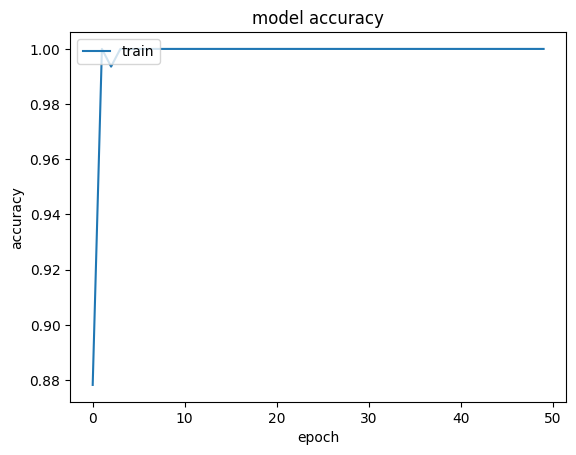

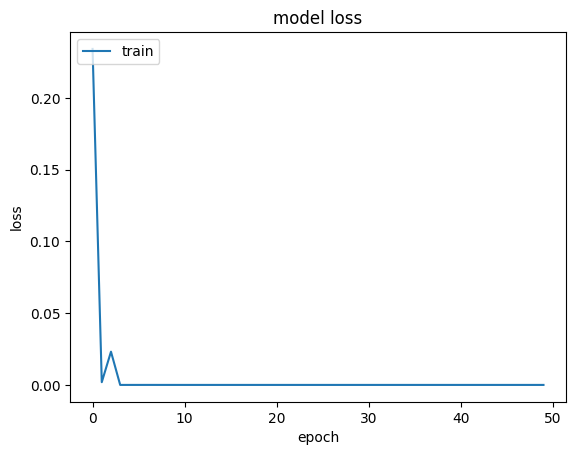

In [14]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model_final.save("face_cnn_model.h5")

In [9]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)

{0: 'duong', 1: 'unknown'}


In [10]:
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)

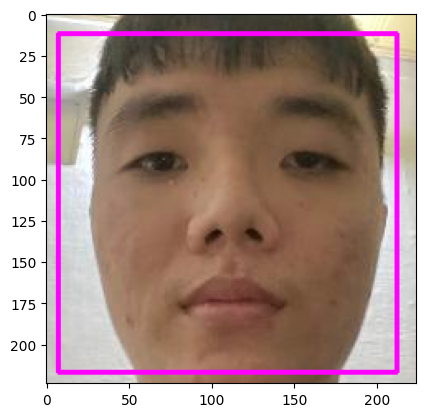

1/1 [==============================] - 0s 324ms/step
[[1. 0.]]
0
Predicted face: duong



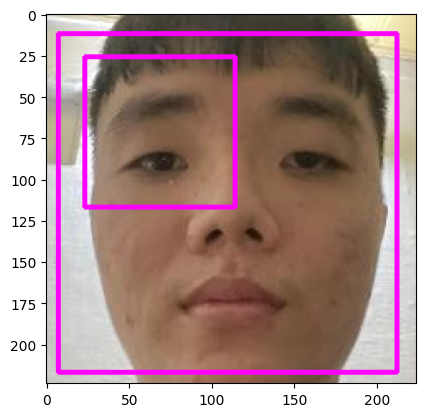

1/1 [==============================] - 0s 129ms/step
[[0. 1.]]
1
Predicted face: unknown



In [15]:
import cv2
from keras_vggface import utils
import keras.utils as image
face_label_filename = 'face-labels.pickle'
model = load_model('face_cnn_model.h5')

with open(face_label_filename, "rb") as \
    f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
facecascade = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_default.xml')

imgtest = cv2.imread("Headshots/duong/2.jpg", cv2.IMREAD_COLOR)
image_array = np.array(imgtest, "uint8")

faces = facecascade.detectMultiScale(imgtest, scaleFactor=1.1, minNeighbors=5)

for (x_, y_, w, h) in faces:
    # draw the face detected
    face_detect = cv2.rectangle(imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
    plt.imshow(face_detect)
    plt.show()

    # resize the detected face to 224x224
    size = (224, 224)
    roi = image_array[y_: y_ + h, x_: x_ + w]
    resized_image = cv2.resize(roi, size)

    # prepare the image for prediction
    x = image.img_to_array(resized_image)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1)

    # making prediction
    predicted_prob = model.predict(x)
    print(predicted_prob)
    print(predicted_prob[0].argmax())
    print("Predicted face: " + class_list[predicted_prob[0].argmax()])
    print("============================\n")

In [13]:
from PIL import Image
import numpy as np
import cv2
import pickle
from tensorflow.keras.models import load_model

face_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_default.xml')

screen_width = 1280     
screen_height = 720

image_width = 224
image_height = 224

model = load_model('face_cnn_model.h5')

with open("face-labels.pickle", 'rb') as f:
    og_labels = pickle.load(f)
    labels = {key:value for key,value in og_labels.items()}
    print(labels)

stream = cv2.VideoCapture(0)

while(True):
    (grabbed, frame) = stream.read()
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    faces = face_cascade.detectMultiScale(
        rgb, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces: 
        roi_rgb = rgb[y:y+h, x:x+w]

        color = (255, 0, 0)
        stroke = 2
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, stroke)

        size = (image_width, image_height)
        resized_image = cv2.resize(roi_rgb, size)
        image_array = np.array(resized_image, "uint8")
        img = image_array.reshape(1,image_width,image_height,3) 
        img = img.astype('float32')
        img /= 255

        predicted_prob = model.predict(img)

        font = cv2.FONT_HERSHEY_SIMPLEX
        name = labels[predicted_prob[0].argmax()]
        color = (255, 0, 255)
        stroke = 2
        cv2.putText(frame, f'({name})', (x,y-8),
            font, 1, color, stroke, cv2.LINE_AA)

        cv2.imshow("Image", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"): 
        break      

stream.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

{0: 'duong', 1: 'unknown'}
1/1 [==============================] - 1s 502ms/step


-1